### Task 1: Merging Multiple .csv Files
- Combining diffrent montly_data files in one merged file

In [1]:
import pandas as pd
import glob
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
csv_files = glob.glob('monthly_file/*.csv')

merged_df = pd.DataFrame()

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    merged_df= merged_df.append(df, ignore_index = True)
    
print(merged_df.head(100))

   Order ID                     Product Quantity Ordered Price Each  \
0    176558        USB-C Charging Cable                2      11.95   
1       NaN                         NaN              NaN        NaN   
2    176559  Bose SoundSport Headphones                1      99.99   
3    176560                Google Phone                1        600   
4    176560            Wired Headphones                1      11.99   
..      ...                         ...              ...        ...   
95   176648            27in FHD Monitor                1     149.99   
96   176649        USB-C Charging Cable                1      11.95   
97   176650    Lightning Charging Cable                1      14.95   
98   176651                      iPhone                1        700   
99   176652          LG Washing Machine                1      600.0   

        Order Date                      Purchase Address  
0   04/19/19 08:46          917 1st St, Dallas, TX 75001  
1              NaN           

In [3]:
merged_df.to_csv('merged.csv', index=False)

In [4]:
df = pd.read_csv('./merged.csv')

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Task 2: Clean up the data
- Removing Duplicates, Null Values and Faulty Data

In [6]:
#Checking the total null values in the column

pd.isnull(df).sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
print(df)

       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46           

### Task 3: Adding Month Column

In [9]:
# Error because there are 'Or' string in Month column
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

### Task 3(i) : Removing rows where month number is 'Or'

In [10]:
df = df[df['Order Date'].str[0:2]!='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### Task 3(ii): Now changing the month column from string to integer

In [11]:
df['Month'] = df['Month'].astype('int64')

In [12]:
df.dtypes['Month']

dtype('int64')

In [13]:
print(df)

       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  Month  
0       04/19/19 08:46    

### Task 4 : Adding Sales Column
- Changing the datatype to numeric

In [14]:
 df['Quantity Ordered'].dtype

dtype('O')

In [15]:
 df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')

In [16]:
df['Price Each'].dtype

dtype('O')

In [17]:
df['Price Each'] = df['Price Each'].astype('float')

In [18]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 5: Adding a city column

In [20]:
# df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City']=df['Purchase Address'].apply(lambda x: get_city(x) +' ' + '('+get_state(x)+')')

In [21]:
df['City'].head()

0          Dallas (TX)
2          Boston (MA)
3     Los Angeles (CA)
4     Los Angeles (CA)
5     Los Angeles (CA)
Name: City, dtype: object

### Task : Generating Insights from the Data

#### Question 1 : What was the best month for sales? How much was earned that month?

In [22]:
max_sales_month = df.groupby(['Month'], as_index = False)['Sales'].sum().sort_values(by= 'Sales', ascending = False)

In [23]:
max_sales_month.head(3)

,Month,Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24


#### Graphical Representation

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales in USD ($) millions')

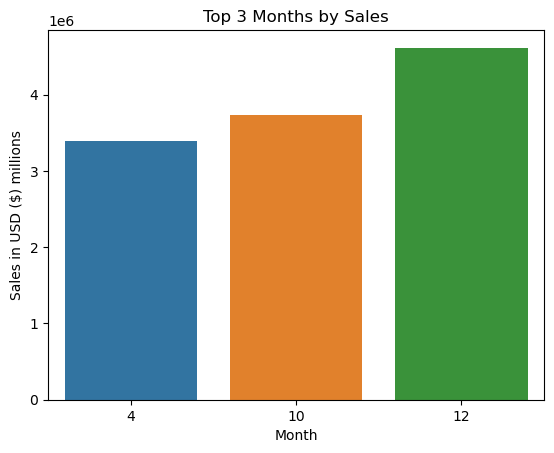

In [25]:
sns.barplot(x='Month',y='Sales', data = max_sales_month.head(3))
plt.title('Top 3 Months by Sales')
plt.ylabel('Sales in USD ($) millions')

### Conclusion to above question:

-  **Best month** for sales was **December** and **total sales amount** earned in that month was approx. **4.61 million**


- Followed by **October(3.74 million)** and **April(3.39 million)** respectively.

#### Question 2 : Which city had the highest number of sales

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [27]:
max_city_sales = df.groupby(['City'], as_index = False)['Sales'].sum().sort_values(by= 'Sales', ascending = False)

In [28]:
max_city_sales.head(3)

,City,Sales
8,San Francisco (CA),8262203.91
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43


Text(0, 0.5, 'Sales ')

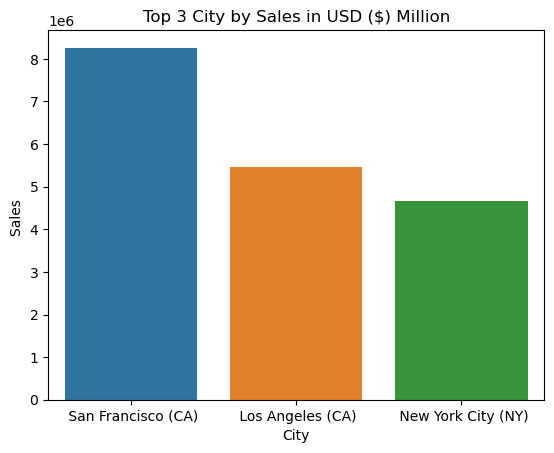

In [29]:
sns.barplot(x='City',y='Sales', data= max_city_sales.head(3))
plt.title('Top 3 City by Sales in USD ($) Million')
plt.ylabel('Sales ')

### Conclusion to above question:

-  **City** with most sales was **San Francisco** and **total sales amount** was approx. **8.26 million**


- Followed by **Los Angeles City(5.45 million)** and **New York City(4.66 million)** respectively.

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [31]:
df['Order Date']

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [32]:
df['Hours'] = df['Order Date'].dt.hour
df['Minutes'] = df['Order Date'].dt.minute

In [33]:
# Bin edges for the time ranges
bin_edges = [0, 3, 6, 9, 12, 15, 18, 21, 24]

# Labels for the bins
bin_labels = ['00-03', '03-06', '06-09', '09-12', '12-15', '15-18', '18-21', '21-24']

# Store the bins
df['Time Bin'] = pd.cut(df['Hours'], bins=bin_edges, labels=bin_labels, right=False)

# Count the number of orders in each time bin
bin_counts = df['Time Bin'].value_counts().sort_index()

print(bin_counts)

00-03     7503
03-06     3006
06-09    12749
09-12    32103
12-15    35700
15-18    31458
18-21    37413
21-24    26018
Name: Time Bin, dtype: int64


Text(0, 0.5, 'Orders Placed')

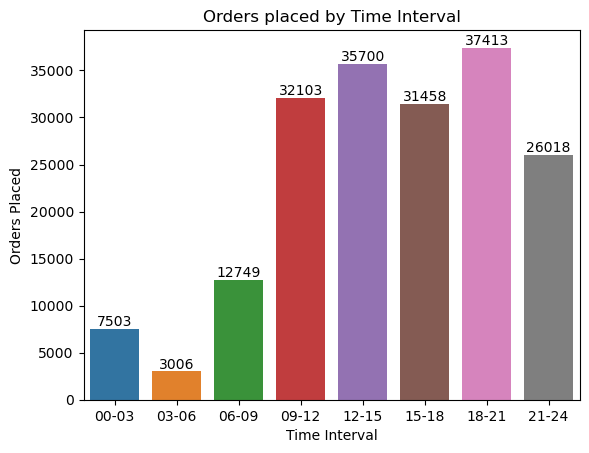

In [34]:
ax=sns.countplot(x='Time Bin',data= df)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Orders placed by Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Orders Placed')

### Conclusion to above question:

- **Best advertisement time** would be between **6pm to 9pm** since the order count is maximum.

- **Second best option** would be between **12pm to 3pm**

#### Question 4: What products are most often sold together?

In [35]:
multi_order_id= df[df['Order ID'].duplicated(keep=False)]

In [36]:
multi_order_id.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes,Time Bin
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,12-15
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,12-15
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,18-21
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,18-21
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,09-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1077,177582,Bose SoundSport Headphones,1,99.99,2019-04-16 17:19:00,"707 9th St, Dallas, TX 75001",4,99.99,Dallas (TX),17,19,15-18
1078,177582,Wired Headphones,1,11.99,2019-04-16 17:19:00,"707 9th St, Dallas, TX 75001",4,11.99,Dallas (TX),17,19,15-18
1088,177592,iPhone,1,700.00,2019-04-19 11:10:00,"448 Maple St, San Francisco, CA 94016",4,700.00,San Francisco (CA),11,10,09-12
1089,177592,Lightning Charging Cable,2,14.95,2019-04-19 11:10:00,"448 Maple St, San Francisco, CA 94016",4,29.90,San Francisco (CA),11,10,09-12


In [38]:
pd.options.mode.chained_assignment = None  #remove the warning
multi_order_id['Grouped'] = multi_order_id.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
multi_order_id.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes,Time Bin,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,12-15,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,12-15,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,18-21,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,18-21,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,09-12,"Bose SoundSport Headphones,Bose SoundSport Hea..."


#### Though the Products are grouped by their Order ID, the strings have concatenated for all cell therefore we have remove the duplicates

In [39]:
multi_order_id = multi_order_id[['Order ID','Grouped']].drop_duplicates()
multi_order_id.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [40]:
from itertools import combinations
from collections import Counter

In [41]:
count=Counter()

for row in multi_order_id['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Conclusion to above question:

- **Most often sold together** product is **iPhone and Lightning Charging Cable**

- **Next** is followed by **Google Phone and USB-C Charging Cable**

#### Question 5: Which product sold the most? Why do you think it sold the most?

In [42]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes,Time Bin
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,06-09
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,21-24
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,12-15
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,12-15
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,09-12


In [43]:
most_sold= df.groupby(['Product'],as_index = False)['Quantity Ordered'].sum().sort_values(by='Quantity Ordered', ascending= False)

In [44]:
most_sold.head()

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


In [47]:
price_group = df.groupby(['Product'], as_index = False)['Price Each'].mean().sort_values(by = 'Price Each', ascending=True)
price_group.head()

,Product,Price Each
5,AAA Batteries (4-pack),2.99
4,AA Batteries (4-pack),3.84
15,USB-C Charging Cable,11.95
17,Wired Headphones,11.99
12,Lightning Charging Cable,14.95


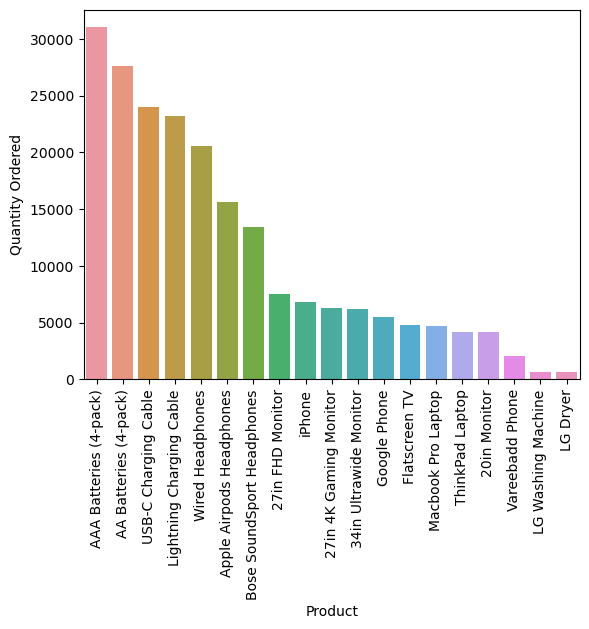

In [57]:
sns.barplot(x='Product',y='Quantity Ordered',data=most_sold)
plt.xticks(rotation=90)
plt.show()

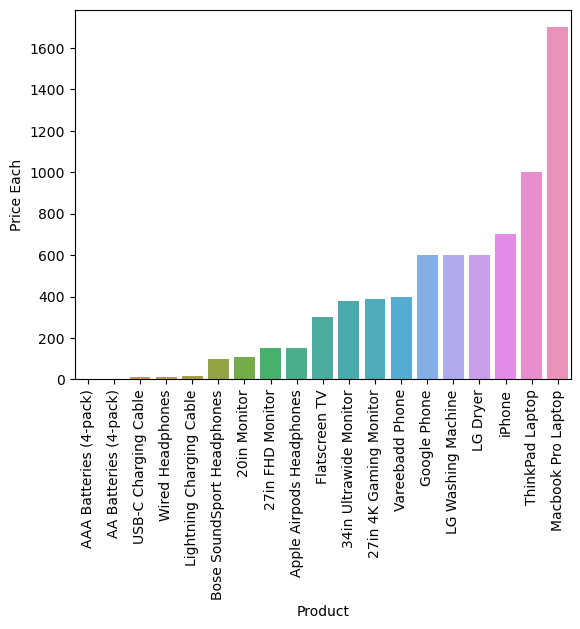

In [60]:
sns.barplot(x='Product',y='Price Each',data=price_group)
plt.xticks(rotation=90)
plt.show()

### Conclusion to above question:

- **Most sold product** is **AAA Batteries (4-Pack)** followed by **AA Batteries (4-Pack)**

- **Potential reason** could be **low priced product** and is used almost everday and everyone.